In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
def autocorrFFT(x):
  N=len(x)
  F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
  PSD = F * F.conjugate()
  res = np.fft.ifft(PSD)
  res= (res[:N]).real   #now we have the autocorrelation in convention B
  n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
  return res/n #this is the autocorrelation in convention A

def msd_fft(r):
  N=len(r)
  D=np.square(r).sum(axis=1) 
  D=np.append(D,0) 
  S2=sum([autocorrFFT(r[:, i]) for i in range(r.shape[1])])
  Q=2*D.sum()
  S1=np.zeros(N)
  for m in range(N):
      Q=Q-D[m-1]-D[N-m]
      S1[m]=Q/(N-m)
  return S1-2*S2

In [3]:
df = pd.read_excel("2Dtrajectory/3_1_2um cubic.xlsx", index_col = 0)
r = df[["X position (nm)","Y position (nm)"]]
r = r.to_numpy()

In [4]:
msd_fft(r)

array([2.38418579e-07, 1.21620470e+05, 2.95822593e+05, ...,
       2.52946685e+08, 2.58732641e+08, 2.66905716e+08])

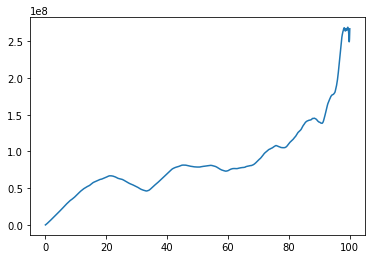

In [5]:
plt.plot(df.index, msd_fft(r))

In [6]:
msd_fft(r)

array([2.38418579e-07, 1.21620470e+05, 2.95822593e+05, ...,
       2.52946685e+08, 2.58732641e+08, 2.66905716e+08])